In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
%matplotlib inline

In [2]:
#G=nx.read_edgelist('bio-celegans.txt', nodetype=int)
N = 5000
p = 0.08
G = nx.erdos_renyi_graph(N, p)

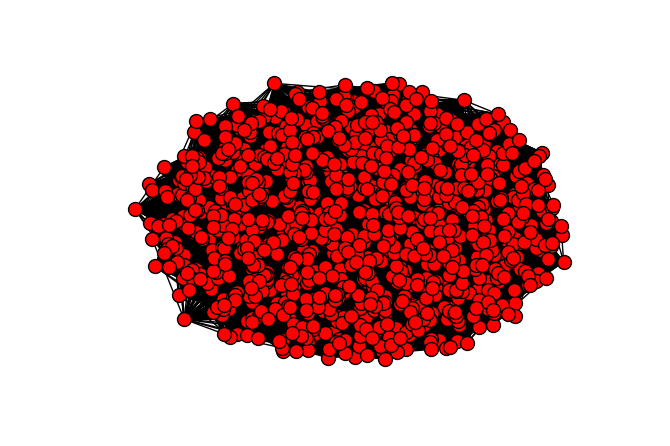

In [11]:
pos=nx.spring_layout(G,iterations=100)
nx.draw(G,pos,node_size=100)#,with_labels=True)

In [3]:
nodeNumber = nx.number_of_nodes(G)
print("Соседи вершины 1: ", *nx.all_neighbors(G, 1))
print("Общее количество вершин: ", nodeNumber)

Соседи вершины 1:  1026 2732 3083 1036 3085 16 19 1047 3099 3103 1057 40 4137 4140 3120 1074 51 2101 1080 4155 1086 64 2113 1097 3147 76 4401 1105 355 1111 3160 1115 95 3169 2146 4795 4196 2149 2156 2160 1896 4115 1726 1470 120 122 123 3197 1151 2185 1165 144 4632 3218 3221 4248 4252 2206 1183 1187 165 1190 1192 1194 1196 3248 2419 31 4284 190 4287 4290 3268 2081 200 1233 2259 1743 378 1248 3297 1250 3299 236 4818 3310 4336 3112 1267 3966 4346 253 255 4992 4373 263 3338 3339 2319 3344 3347 3349 3355 284 4381 4144 3362 1243 2341 146 2347 4317 3376 3377 1075 3382 3383 4987 2366 4416 1760 1351 1353 1355 333 334 336 3640 339 343 4440 347 3420 1375 1376 1379 3431 2412 365 367 4465 3443 375 4473 2426 4671 4476 381 3454 1409 2438 1943 1420 1432 2457 1434 3486 4516 3494 1447 4520 4525 2060 4527 434 3315 446 2487 4379 2804 3515 4541 2494 2497 450 4549 1478 2504 3148 1613 1489 468 2523 1500 4653 2528 2536 2812 490 1515 1367 3566 2545 1524 3573 2550 3576 1529 2554 4351 1532 4606 2559 512 4927 517

## Model 1

Выбираем случайно вершину i и активируем ее (заражаем, если говорить в терминах эпидемиологии). Далее, итерационно делаем следующее: 

1. Выбираем случайным образом одного неактивного соседа этой вершины, скажем вершину j. И с вероятностью p (параметр модели) заражаем вершину j. 

2. Вершина от которой пошло заражение (вершина i) с комплементарной вероятностью становится здоровой (т.е. с вероятностью 1-p).

3. Из зараженных случайно выбираем одну и повторяем шаги 1,2.

Вопрос, на который мы хотим ответить как зависит доля зараженных в стационарном состоянии (сделали много, много шагов) от параметра модели p.


In [4]:
inf = []
susc = []
numberSteps = 1000
thresholdInf = 0.1
thresholdSusc = 0.9

#выбираем случайным образом начальную вершину
cur_infected_node = random.randint(1, nx.number_of_nodes(G))

for i in range(numberSteps):
    print("Current infected: ", cur_infected_node)
    
    #заражаем здоровую вершину
    if cur_infected_node not in inf:
        inf.append(cur_infected_node)
    print("All infected nodes: ", inf)
    
    #выбираем случайным образом одного неактивного соседа этой вершины
    not_infected_neighbors = []
    for i in list(nx.all_neighbors(G, cur_infected_node)):
        if i not in inf:
            not_infected_neighbors.append(i)
    #если у вершины нет здоровых соседей, завершаем заражение
    if not not_infected_neighbors:
        print("Exit")
        break
        
    print("All neighbors of {}: ".format(cur_infected_node), list(nx.all_neighbors(G, cur_infected_node)))
    
    next_infected_node = None
    p = random.uniform(0, 1)
    print(p)
    if p > thresholdInf:
        next_infected_node = random.choice(not_infected_neighbors)
    
    p = random.uniform(0, 1)
    print(1 - p)
    if 1 - p > thresholdSusc:
        print("Вершина {} выздоровела".format(cur_infected_node))
        inf.remove(cur_infected_node)
        if next_infected_node == None:
            print("не заразили никого, и сами выздоровели")
            break
        
    if next_infected_node != None:
        print("Next infected: ", next_infected_node)
        cur_infected_node = next_infected_node
    print("-------------------------------")
print("All infected nodes: ", inf)

Current infected:  4188
All infected nodes:  [4188]
All neighbors of 4188:  [2048, 1028, 3082, 2062, 4113, 4115, 2068, 1045, 22, 2074, 4954, 4130, 2088, 1074, 2099, 3127, 4153, 4156, 1085, 3137, 3138, 4166, 1095, 1097, 3146, 2123, 4173, 1103, 3152, 82, 4182, 88, 2137, 3169, 98, 101, 3174, 3601, 2153, 1131, 4626, 2161, 481, 116, 4213, 1142, 1144, 4220, 3198, 4223, 1368, 1158, 3208, 1162, 3214, 4239, 1170, 1172, 1175, 1179, 4122, 2207, 1184, 161, 3237, 2216, 3244, 3246, 2235, 194, 196, 1222, 207, 3282, 1241, 1243, 221, 2272, 1249, 2275, 4646, 4817, 233, 3306, 3307, 4477, 4136, 4339, 4649, 1272, 3325, 1279, 2306, 4356, 1288, 4361, 1293, 1294, 2322, 3348, 4374, 2327, 4376, 1412, 2331, 1310, 3364, 2341, 3804, 2348, 3122, 3376, 305, 4402, 1332, 310, 1336, 4410, 1341, 319, 3296, 3394, 3395, 1348, 4429, 4432, 2773, 1363, 340, 4438, 3416, 2393, 3419, 3421, 898, 3424, 4449, 1380, 2405, 362, 2962, 2415, 4464, 371, 373, 2428, 1258, 2430, 385, 3458, 3460, 393, 66, 2447, 408, 402, 2453, 1991, 3480, 

In [5]:
def getInfectedFractionModel1(G, numberSteps, thresholdInf, thresholdSusc, startNode):
    inf = []
    susc = []
    
    #выбираем случайным образом начальную вершину
    cur_infected_node = random.randint(1, nx.number_of_nodes(G))
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем случайным образом одного неактивного соседа этой вершины
        not_infected_neighbors = []
        for i in list(nx.all_neighbors(G, cur_infected_node)):
            if i not in inf:
                not_infected_neighbors.append(i)
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            break
    
        next_infected_node = None
        p = random.uniform(0, 1)
        if p < thresholdInf:
            next_infected_node = random.choice(not_infected_neighbors)
        
        p = random.uniform(0, 1)
        if 1 - p < thresholdSusc:
            inf.remove(cur_infected_node)
            if next_infected_node == None:
                break
            
        if next_infected_node != None:
            cur_infected_node = next_infected_node
    return inf

In [6]:
infected = getInfectedFractionModel1(G, 10000000, 0.8, 0.2, 1)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

Доля зараженных:  0.0004


In [7]:
prob = np.arange(0.01, 0.99, 0.02)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr = []
for p in prob:
    infected_arr = getInfectedFractionModel1(G, 1000000, p, 1-p, startNode)
    inf_arr.append(len(infected_arr) / nx.number_of_nodes(G))

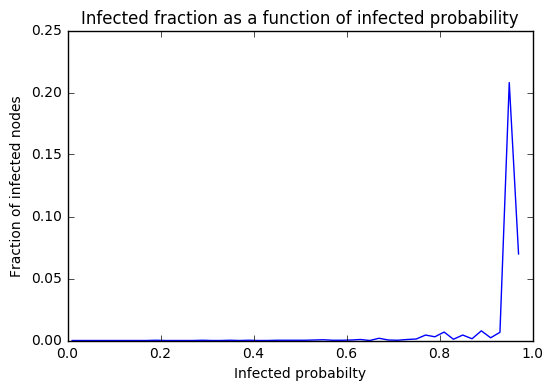

In [8]:
plt.title('Infected fraction as a function of infected probability')
plt.plot(prob, inf_arr)
plt.xlabel('Infected probabilty')
plt.ylabel('Fraction of infected nodes')

In [9]:
def getInfectedFractionAtEachStepModel1(G, numberSteps, thresholdInf, thresholdSusc, startNode):
    inf = []
    susc = []
    inf_arr_fraction, susc_arr_fraction = [], []
    
    #выбираем случайным образом начальную вершину
    cur_infected_node = random.randint(1, nx.number_of_nodes(G))
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем случайным образом одного неактивного соседа этой вершины
        not_infected_neighbors = []
        for i in list(nx.all_neighbors(G, cur_infected_node)):
            if i not in inf:
                not_infected_neighbors.append(i)
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            break
    
        next_infected_node = None
        p = random.uniform(0, 1)
        if p < thresholdInf:
            next_infected_node = random.choice(not_infected_neighbors)
        
        p = random.uniform(0, 1)
        if 1 - p < thresholdSusc:
            inf.remove(cur_infected_node)
            if next_infected_node == None:
                break
            
        if next_infected_node != None:
            cur_infected_node = next_infected_node
            
        inf_arr_fraction.append(len(inf) / nx.number_of_nodes(G))
        susc_arr_fraction.append((nx.number_of_nodes(G) - len(inf)) / nx.number_of_nodes(G))
        
    return inf_arr_fraction, susc_arr_fraction

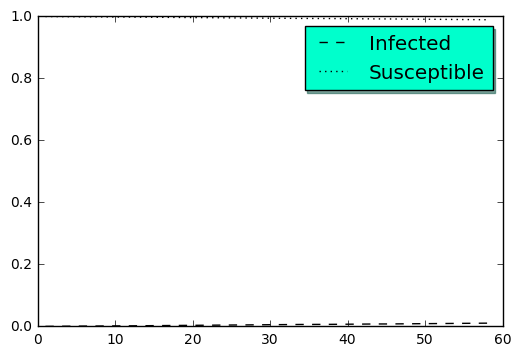

In [10]:
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_fraction, susc_arr_fraction = [], []
inf_arr_fraction, susc_arr_fraction = getInfectedFractionAtEachStepModel1(G, 100000, 0.95, 0.05, startNode)
steps = np.arange(1, len(inf_arr_fraction) + 1, 1)

fig, ax = plt.subplots()
ax.plot(steps, inf_arr_fraction, 'k--', label='Infected')
ax.plot(steps, susc_arr_fraction, 'k:', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

plt.show()

## Model 2

Выбираем случайно вершину i и активируем ее. Далее, итерационно делаем следующее: 
1. Берем ВСЕХ неактивных соседей этой вершины и с вероятностью p (параметр модели) заражаем каждую из них. 
2. Вершина от которой пошло заражение (вершина i) становится здоровой (неактивной)
3. Из зараженных случайно выбираем одну и повторяем шаги 1, 2

In [11]:
inf = []
susc = []
numberSteps = 10
thresholdInf = 0.8
thresholdSusc = 0.1

inf_dict = defaultdict(list)

#выбираем случайным образом начальную вершину
cur_infected_node = random.randint(1, nx.number_of_nodes(G))

for i in range(numberSteps):
    print("Current infected: ", cur_infected_node)
    
    #заражаем здоровую вершину
    if cur_infected_node not in inf:
        inf.append(cur_infected_node)
    print("All infected nodes: ", inf)
    
    #выбираем всех неактивных соседей этой вершины
    not_infected_neighbors = []
    for j in list(nx.all_neighbors(G, cur_infected_node)):
        if j not in inf:
            not_infected_neighbors.append(j)
    print('Соседи, которые могут быть заражены:', not_infected_neighbors)
    
    #если у вершины нет здоровых соседей, завершаем заражение
    if not not_infected_neighbors:
        print("Exit")
        break
        
    if not_infected_neighbors:
        for elem in not_infected_neighbors:
            p = random.uniform(0, 1)
            print(p, elem)
            if p < thresholdInf:
                print('+ 1 заражение')
                inf_dict[i].append(elem)
                print('Добавили след. элемент: ', elem)
    print(inf_dict)         
    
    for key, val in inf_dict.items():
        print('Словарь зараженных: на шаге {0} заражены: {1}'.format(key, val))
        
    #добавим в список зараженных новые вершины
    for j in inf_dict[i]:
        inf.append(j)
    
    if inf_dict[i]:
        inf.remove(cur_infected_node)
        cur_infected_node = random.choice(inf_dict[i])
        
    
    print("-------------------------------")
print("All infected nodes: ", inf)

Current infected:  3450
All infected nodes:  [3450]
Соседи, которые могут быть заражены: [1026, 3, 4101, 3084, 1037, 2064, 2222, 23, 3097, 29, 4570, 33, 36, 2085, 2086, 4146, 51, 1078, 3128, 61, 4159, 65, 4163, 3140, 1095, 74, 4172, 2125, 1103, 3153, 2131, 4181, 88, 91, 2141, 2142, 107, 4207, 3184, 113, 3188, 117, 2166, 3191, 3193, 4222, 3200, 4226, 4229, 136, 138, 4235, 3212, 1172, 150, 2200, 2202, 2206, 1184, 3234, 3241, 1194, 174, 4302, 177, 4275, 3614, 2230, 4916, 3263, 4288, 3105, 3275, 3277, 1230, 1231, 376, 3282, 1439, 718, 2262, 1060, 3290, 4303, 220, 3294, 1251, 3303, 2281, 235, 3309, 2286, 1264, 246, 2297, 250, 4475, 2301, 1278, 1237, 2304, 929, 259, 2309, 2310, 3337, 2316, 4376, 282, 3356, 4314, 4383, 2337, 290, 4389, 3367, 4392, 3369, 1322, 4396, 4658, 3375, 3377, 306, 4147, 4409, 1338, 2363, 316, 394, 319, 4416, 2369, 2373, 1357, 3406, 3407, 2385, 4435, 4437, 4440, 346, 3421, 2398, 4451, 1383, 3436, 3133, 1395, 2421, 375, 2424, 3451, 3477, 2795, 1412, 2440, 1417, 1418, 141

In [12]:
def getInfectedFractionModel2(G, numberSteps, thresholdInf, startNode):    
    inf = []
    susc = []
    
    inf_dict = defaultdict(list)
    
    cur_infected_node = startNode
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем всех неактивных соседей этой вершины
        not_infected_neighbors = []
        for j in list(nx.all_neighbors(G, cur_infected_node)):
            if j not in inf:
                not_infected_neighbors.append(j)
    
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            print("Exit")
            break
            
        if not_infected_neighbors:
            for elem in not_infected_neighbors:
                p = random.uniform(0, 1)
                if p < thresholdInf:
                    inf_dict[i].append(elem)
        
        #for key, val in inf_dict.items():
        #    print('Словарь зараженных: на шаге {0} заражены: {1}'.format(key, val))
            
        #добавим в список зараженных новые вершины
        for j in inf_dict[i]:
            inf.append(j)
        
        if inf_dict[i]:
            inf.remove(cur_infected_node)
            cur_infected_node = random.choice(inf_dict[i])
            
    print("-----------------------------------")
    print("SIS model")
    print("-----------------------------------")
    print('Initial infected node: ', startNode)
    print('Number of steps: ', numberSteps)
    print('Infected probability: ', thresholdInf)
            
    return inf

In [13]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 100, 0.89, startNode)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  1805
Number of steps:  100
Infected probability:  0.89
Доля зараженных:  0.9938


In [14]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 100, 1, startNode)
print(infected)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  395
Number of steps:  100
Infected probability:  1
[3076, 3926, 1031, 3085, 4110, 16, 1042, 4953, 24, 1050, 1055, 1056, 4131, 2086, 3113, 3036, 2094, 2095, 4145, 3123, 2100, 1083, 1085, 3135, 4166, 4170, 1099, 1104, 3153, 3598, 86, 3161, 1120, 4193, 1122, 99, 2066, 4206, 3183, 4212, 3189, 120, 4747, 3199, 2177, 3205, 3207, 4233, 1232, 3214, 143, 4242, 147, 1173, 4949, 3223, 152, 1178, 4251, 2204, 3229, 158, 159, 2208, 4438, 2214, 168, 3241, 4881, 2225, 3251, 184, 2236, 3261, 4981, 1216, 3268, 3273, 1228, 3280, 1400, 211, 213, 214, 4311, 220, 4986, 223, 208, 2276, 3110, 4326, 3303, 1256, 2281, 1258, 2283, 4304, 4333, 238, 1264, 241, 1267, 3317, 4345, 1274, 1278, 1282, 2307, 854, 1287, 2312, 2313, 3338, 3339, 4365, 3345, 387, 4142, 3350, 2329, 1307, 4826, 4382, 2338, 1315, 1317, 2343, 2346, 303, 306, 4147, 2782, 1334, 4408, 2364, 2367, 3396, 2375, 3400, 4425, 333, 3406, 1359, 1361, 3

In [15]:
startNode = random.randint(1, nx.number_of_nodes(G))
infected = getInfectedFractionModel2(G, 100, 0, startNode)
print(infected)
print("Доля зараженных: ", len(infected) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  4931
Number of steps:  100
Infected probability:  0
[4931]
Доля зараженных:  0.0002


In [17]:
prob_model2 = np.arange(0.01, 0.99, 0.1)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_model2 = []
for p in prob_model2:
    infected_arr = getInfectedFractionModel2(G, 10000, p, startNode)
    inf_arr_model2.append(len(infected_arr) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  219
Number of steps:  10000
Infected probability:  0.01
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  219
Number of steps:  10000
Infected probability:  0.11
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  219
Number of steps:  10000
Infected probability:  0.21
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  219
Number of steps:  10000
Infected probability:  0.31
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  219
Number of steps:  10000
Infected probability:  0.41
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  219
Number of steps:  10000
Infected probability:  0.51
----------------------------

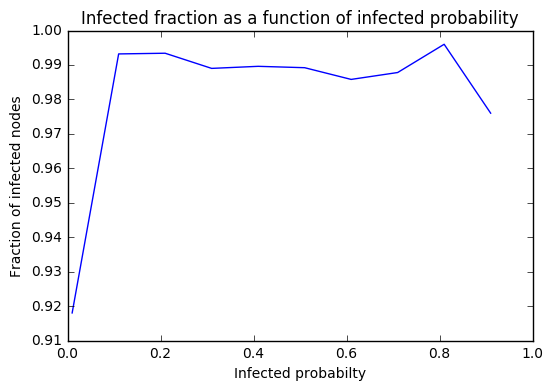

In [18]:
plt.title('Infected fraction as a function of infected probability')
plt.plot(prob_model2, inf_arr_model2)
plt.xlabel('Infected probabilty')
plt.ylabel('Fraction of infected nodes')

##### Интересно, зависит ли заражение от источника заражения?

In [19]:
start_nodes = np.arange(1, 100, 1)
inf_arr_model2 = []
for startNode in start_nodes:
    infected_arr = getInfectedFractionModel2(G, 100, 0.5, startNode)
    inf_arr_model2.append(len(infected_arr) / nx.number_of_nodes(G))

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  1
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  2
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  3
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  4
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  5
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
-----------------------------------
Initial infected node:  6
Number of steps:  100
Infected probability:  0.5
-----------------------------------
SIS model
------------

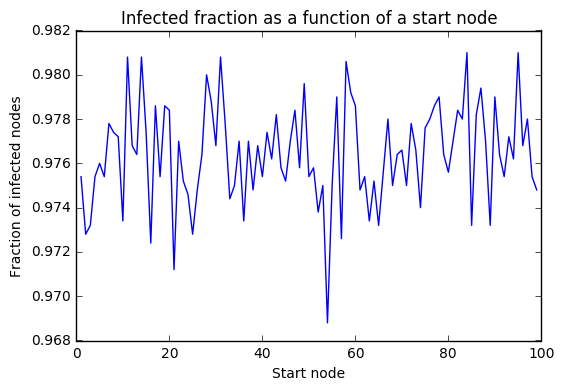

In [20]:
plt.title('Infected fraction as a function of a start node')
plt.plot(start_nodes, inf_arr_model2)
plt.xlabel('Start node')
plt.ylabel('Fraction of infected nodes')

##### Вывод: в модели 2 зависимости от стартовой вершины заражения не выявлено

In [21]:
def getInfectedFractionAtEachStepModel2(G, numberSteps, thresholdInf, startNode):    
    inf = []
    susc = []
    infected_fraction = []
    susc_fraction = []
    
    inf_dict = defaultdict(list)
    
    cur_infected_node = startNode
    
    for i in range(numberSteps):
        
        #заражаем здоровую вершину
        if cur_infected_node not in inf:
            inf.append(cur_infected_node)
        
        #выбираем всех неактивных соседей этой вершины
        not_infected_neighbors = []
        for j in list(nx.all_neighbors(G, cur_infected_node)):
            if j not in inf:
                not_infected_neighbors.append(j)
    
        #если у вершины нет здоровых соседей, завершаем заражение
        if not not_infected_neighbors:
            print("Exit")
            break
            
        if not_infected_neighbors:
            for elem in not_infected_neighbors:
                p = random.uniform(0, 1)
                if p < thresholdInf:
                    inf_dict[i].append(elem)
            
        #добавим в список зараженных новые вершины
        for j in inf_dict[i]:
            inf.append(j)
        
        if inf_dict[i]:
            inf.remove(cur_infected_node)
            cur_infected_node = random.choice(inf_dict[i])
            
        infected_fraction.append(len(inf) / nx.number_of_nodes(G))
        susc_fraction.append((nx.number_of_nodes(G) - len(inf)) / nx.number_of_nodes(G))
            
    print("-----------------------------------")
    print("SIS model")
    print("-----------------------------------")
    print('Initial infected node: ', startNode)
    print('Number of steps: ', numberSteps)
    print('Infected probability: ', thresholdInf)
             
    return infected_fraction, susc_fraction

In [28]:
steps = np.arange(1, 10001, 1)
startNode = random.randint(1, nx.number_of_nodes(G))
inf_arr_fraction, susc_arr_fraction = [], []
inf_arr_fraction, susc_arr_fraction = getInfectedFractionAtEachStepModel2(G, 10000, 0.05, startNode)

-----------------------------------
SIS model
-----------------------------------
Initial infected node:  4301
Number of steps:  10000
Infected probability:  0.05


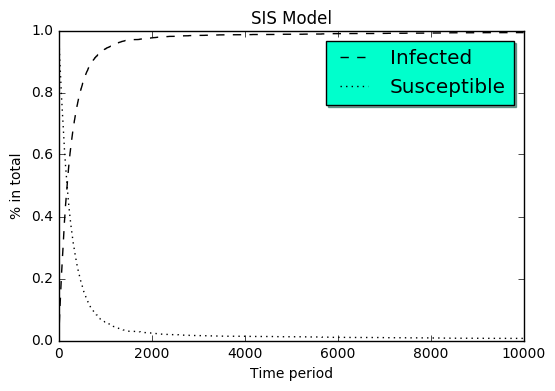

In [29]:
fig, ax = plt.subplots()
ax.plot(steps, inf_arr_fraction, 'k--', label='Infected')
ax.plot(steps, susc_arr_fraction, 'k:', label='Susceptible')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

legend.get_frame().set_facecolor('#00FFCC')

ax.set_xlabel('Time period')
ax.set_ylabel('% in total')
ax.set_title('SIS Model')

plt.show()